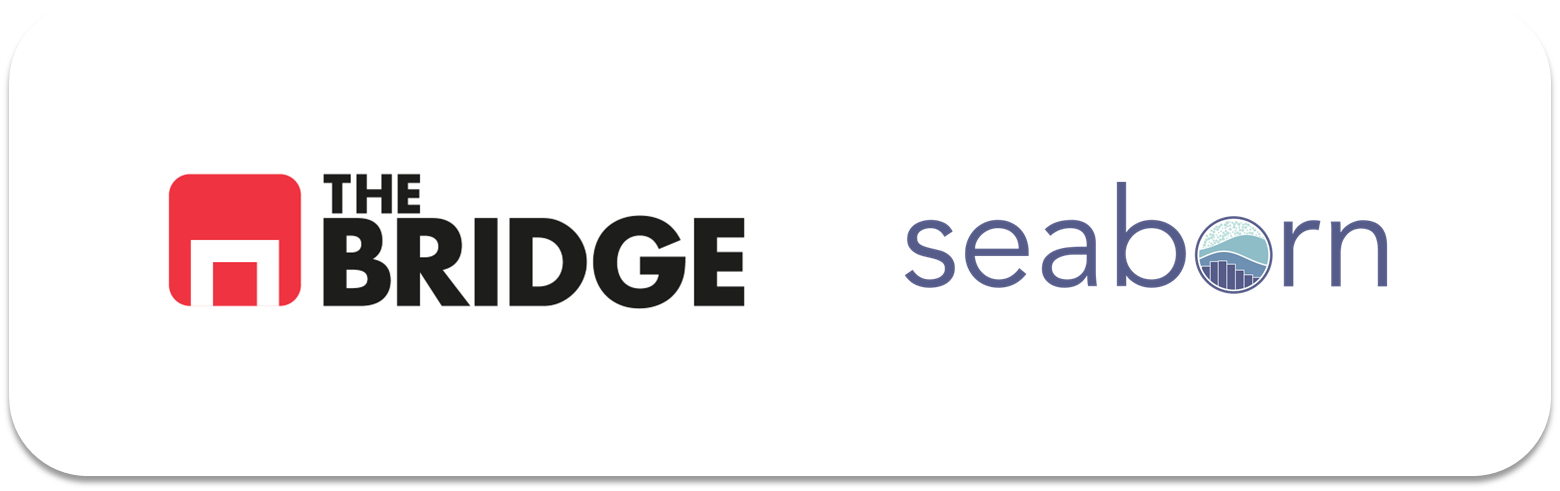

# Visualización Aplicada: Comparando Variables Categóricas

Nos enfocamos ahora ya en visualizar la relación entre dos variables, en concreto entre dos variables categóricas. Lancemos los preparativos:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")
df_vuelos = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")


## Categóricas

### Gráficos y consideraciones

Vamos a ver:
* Comparativa de frecuencias por valores de una de las variables (con diagramas de barras y catplot)
* Tablas de contigencia (como mapas de calor)

* **Cuándo**: En análisis bivariantes los dos tipos son convenientes, nos dara una visualizacion rapida de las propias relaciones, si existen o no (recuerda: si estas trabajando con una muestra de datos y quieres extrapolar tienes que hacer tus series de significacion estadistica). En presentaciones( **es mejor los graficos de barras comparadas)** las tablas de contigencia suelen ser demasiado "informativas" (Como todos los heatmaps si llevan números), pero son visualmente "atractivas" si se usan bien los colores. De usar tablas/mapas de calor quitar los numeros, remarcar la zona donde esté el dato importante que justifique nuestro mensaje.

* **Cuándo no**: En presentaciones, no usar tablas (casi) NUNCA (sí eso nunca, demasiados números y estás out), bueno savo que alguien te haya pedido que quiere ver los números de esa tabla o la tabla sea de dos por dos. Los mapas de calor sin números salvo en las casillas realmente relevantes.

* **Genérico**: Además si las variables tienen cardinalidades altas, en presentación aplica lo que ya dijimos crear categorías otros para poner allí las categorias no relevantes de una y otra variable (si es necesario no mostrarla)(recomiendo: que reduzca la cardinalidad quedandote con 3 o 4 valores de esa variable categorica por cada variable(2) quedandome con los que ayuden a reforzar el mensaje que quieres trasmitir: justificando tu tesis y servirte de apoyo aqunue no lo justifique del todo)

### Catplot comparativa de frecuencias con Seaborn

Antes de empezar con las gráficas no está de más recordar como obtener las frecuencias de una variable (las de dos lo veremos en las tablas de contingencia):


In [7]:
F_abosulta = df_titanic.who.value_counts()
F_relativa= df_titanic.who.value_counts(normalize=True)*100

print(F_abosulta)
print(F_relativa)

who
man      537
woman    271
child     83
Name: count, dtype: int64
who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64


In [4]:
# Obtener las freceuncias absolutas y relativas de la variable/columna "state" del dataset df_seguros

frecuencias_absolutas = df_seguros["state"].value_counts()
frecuencias_relativas = df_seguros["state"].value_counts(normalize = True) *  100

print(frecuencias_absolutas)
print(frecuencias_relativas)

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
state
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: proportion, dtype: float64


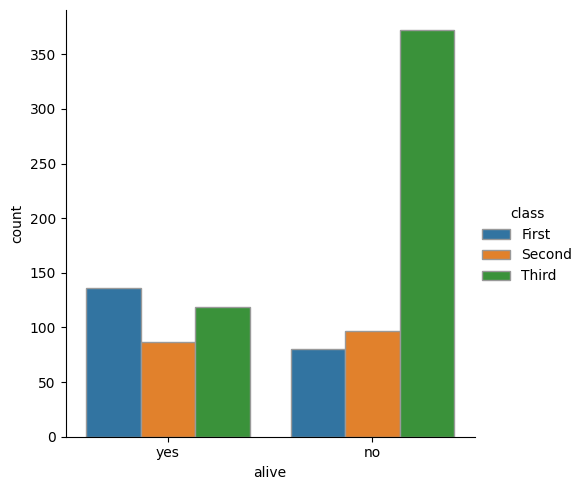

In [8]:
#AC
#### Tablas de frecuencias absolutas modo 1
#(permite dibujar 2 diagramas de barraas de 2 variables categoricas comparando sus F.absolutas)
sns.catplot(x ="alive", # podria ver las clases y ver el % de supervienciia por clase pondria class
            hue="class", # nos pone diferentes colores para cada clase
            kind="count", #permite diferentes tipos de graficos sobre varibles categoricas
            edgecolor=".6", # color de los bordes
            orient="V", 
            data=df_titanic.sort_values("class"));# ordena por clase de 1 a 3;

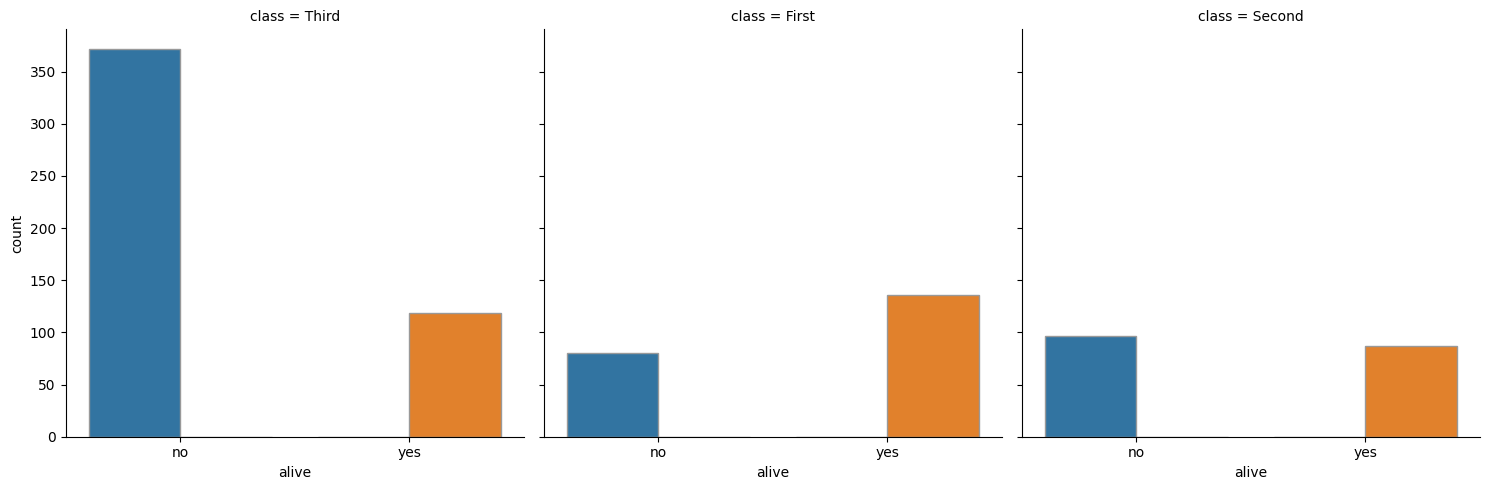

In [9]:
# Tabla de frecuencias modo 2
sns.catplot(x="alive",
            col = "class",# me va a sacar un columna diferente para cada uno de los valores de la varieble categorica class
            kind="count",# es el que se usa para frecuencias absolutas
            edgecolor=".6",
            orient = "V",
            hue = "alive",# tipo de color por alive
            legend= True,# me pondra una leyenda
            data=df_titanic);

Si queremos frecuencias relativas, primero tenemos que calcularlas y luego ya aplicamos una visualización:( es un mal de matplotlib y seaborn)

In [11]:
#AC
cat_colx= "alive"
cat_coly="class"
F_abosultas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts()# para hallar la F.abs de 3 variables
F_relativas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts(normalize=True)#*100, aqui no funciona

print(F_abosultas)
print(F_relativas)



    class alive  count
0   First   yes    136
1   First    no     80
2  Second    no     97
3  Second   yes     87
4   Third    no    372
5   Third   yes    119
    class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363


In [12]:
F_relativas["proportion"] *= 100# usando lo operadores acumulados, TRUCO

In [13]:
F_relativas

,class,alive,proportion
0,First,yes,62.962963
1,First,no,37.037037
2,Second,no,52.717391
3,Second,yes,47.282609
4,Third,no,75.763747
5,Third,yes,24.236253


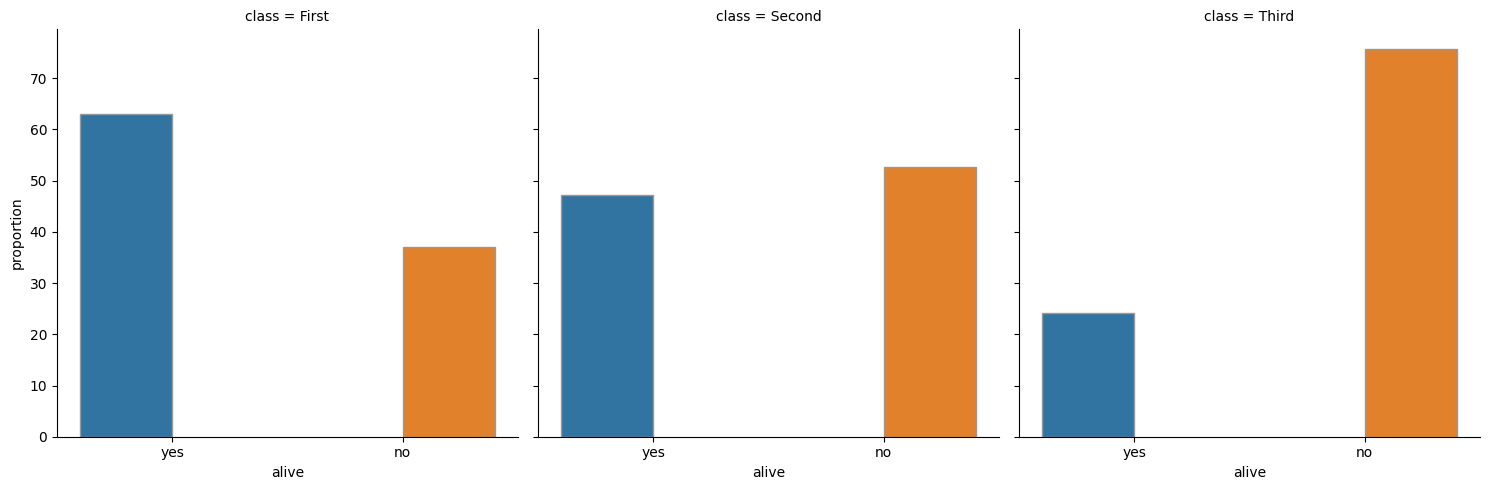

In [14]:
# Pintamos modo1# mismo grafico pero en F-relativas
sns.catplot(x="alive",
            y = "proportion",# se llama y pq le voy a cambiar elkind
            col="class",# una columna por cada uno de los valores que se le indica en el argunmento col( variable categorica)
            hue = "alive",# colores por alive
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",# colr de los bordes
            data=F_relativas);


### Tablas de contingencia y Mapas de Calor

Otra forma numérica de ver las frecuencias de aparición conjunta de los valores de dos variables categóricas es recurrir a las tablas de contingencia:

In [15]:
#AC# ya lo usamos para conseguir el estadistico de chi cuadrado
tabla_contingencia = pd.crosstab(df_titanic["embark_town"], df_titanic["who"], margins= False)

tabla_contingencia


who,child,man,woman
embark_town,,,
Cherbourg,18,90,60
Queenstown,5,37,35
Southampton,60,410,174


Compárala con nuestra forma de obtener frecuencias absolutas:

In [16]:
cat_colx = "who"
cat_coly = "embark_town"
frecuencias_absolutas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_absolutas

,embark_town,who,count
0,Cherbourg,man,90
1,Cherbourg,woman,60
2,Cherbourg,child,18
3,Queenstown,man,37
4,Queenstown,woman,35
5,Queenstown,child,5
6,Southampton,man,410
7,Southampton,woman,174
8,Southampton,child,60


La primera puede que te resulte más útil a ti visualmente para analizar, la seguda es más manejable en términos de programación.

#### Mapa de calor de la tabla de contigencia:

Si queremos que la tabla de contingencia sea más "presentable", la convertimos en un mapa de calor:

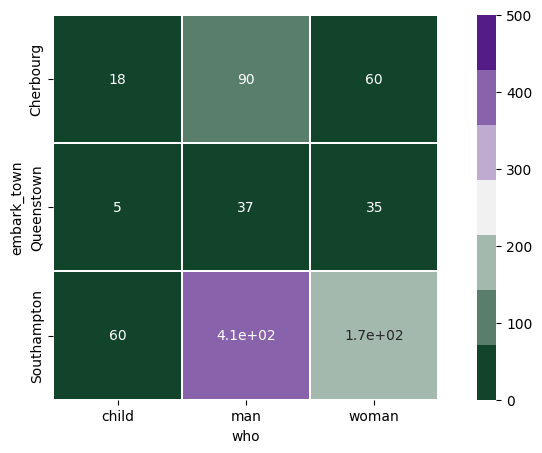

In [17]:
#AC
plt.figure(figsize=(10,5))
sns.heatmap(tabla_contingencia,# mapa de calor sobre la tabla de contingencia con las frecuencias absolutas
            vmin=0,# minimo de la escala de colores
            vmax=500,# max de la escaa de colores
            cmap=sns.diverging_palette(145,280, s=85, l=25, n=7),# mapa de colores
            square= True,# dimension que sea cuadrada
            linewidths= .1,# la anchura entre los cuadraditos dentro del heatmap
            annot=True);# con esto le digo que ponga los valores con True


Bastante visual,¿eh? Incluso más que las barras de frecuencia, si es lo que quiero mostrar... Pero es engorrosa... De usarla cómo lo haría yo:

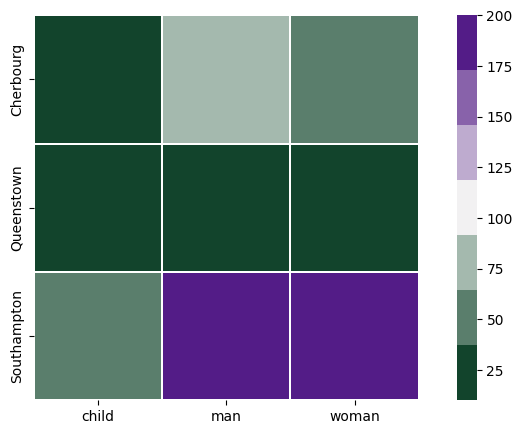

In [18]:

plt.figure(figsize=(10,5))
sns.heatmap(tabla_contingencia,
            vmin = 10,
            vmax = 200,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square = True,
            linewidths=.1,
            annot=False);# sin numeros
plt.xlabel("")# sin titulos e nlos ejes
plt.ylabel("");

asi es mejor para un apresentacion, ya que demasiados numeros distraen, y despues pudo poner manuelamente lo que me interese destacar 